In [1]:
import cv2
import pytesseract
import os
import matplotlib.pyplot as plt


In [3]:
!pip install easyocr


     |████████████████████████████████| 63.6 MB 66 kB/s              
     |████████████████████████████████| 47.6 MB 11.9 MB/s            
     |████████████████████████████████| 3.0 MB 12.2 MB/s            
     |████████████████████████████████| 13.8 MB 9.9 MB/s             
     |████████████████████████████████| 6.3 MB 12.3 MB/s            
     |████████████████████████████████| 1.9 MB 11.0 MB/s            
     |████████████████████████████████| 3.3 MB 12.8 MB/s            
     |████████████████████████████████| 178 kB 10.6 MB/s            
     |████████████████████████████████| 3.3 MB 12.6 MB/s            
     |████████████████████████████████| 3.3 MB 11.8 MB/s            
     |████████████████████████████████| 3.3 MB 11.2 MB/s            
     |████████████████████████████████| 3.3 MB 11.1 MB/s            
     |████████████████████████████████| 3.3 MB 12.3 MB/s            
     |████████████████████████████████| 3.3 MB 12.2 MB/s            
     |█████████████████████████

# EASY OCR

In [7]:
import easyocr

from easyocr import Reader


img = cv2.imread('img1.png')
reader = easyocr.Reader(['en'])




CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


# Result for EASY OCR

In [11]:
result = reader.readtext(thresh3,paragraph="False")
print(result)


[[[[629, 1102], [1748, 1102], [1748, 2645], [629, 2645]], 'WHOLE FOODS M 4 R R € T WESTPORT  CT 06880 FOODS MARKET WHOLE (203) 227-6858 POST RD WEST 399 4.99 F BAcON LS NP 365 4 .99 F BAcoN LS MP 365 4.99 F BAcON LS NP 365 LS MP 4.99 bacon F 365 NP 2.19 BROTH ChIC 11.99 F ALMOND NP FLOUR NP 18 . 80 F BNLSS SK CHKN BRST NP 3.39 F L HEAVY CREAM NP 6 . 49 REDUCT F BALSMC NP 5 , 04 GRND 85/15 BEEF 8 , 99 F CASHEW C NP JUICE COF NP 14.49 F Pint ORGANIC dOcS NP 9 . 99 F ALKOND BUTTER Hny 101.33 00 BAL Xx** Tax']]


y - wesTPoRT. CT 06880

yHoLE FOODS NARKE
399 post RD WEST ~ ;

903) 227-6858

BACON LS NP
pacon LS N

BACON LS NP
pacon tS N

365

 



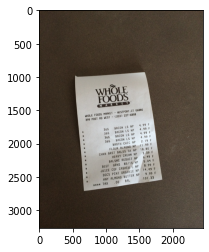

In [2]:
img = cv2.imread('img1.png')

plt.imshow(img[:,:,::-1])
image_data = pytesseract.image_to_string(img)
print(image_data)


# Greyscaling

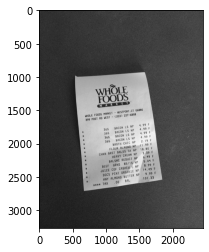

In [9]:
grey_scale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(grey_scale, cmap="gray")

# Thresholding(compared both Easy ocr and Pytesseract result is good in Pytesseract)


WHOLE FOODS MARKET - WESTPORT CT 06880 .
399 post RD west - (203) 221-6858
% 365 BACON LS NP 4.99 F
* 365 BACON LS NP 4.99 F
% 365 BACON LS NP 4.99 F
* 365 BACON LS NP 4.99 F
% BROTH CHIC wp 29 F a
% FLOUR qLMOND NP 11.99 F
% CHKN BRST BNLSS SK yp 18.80 F
% HEAVY CREAM NP 3.39 F :
x BALSHC aepuct NP 6.49 F
% BEEF GRND g6/15 NP 5.04 F
* JUICE cor CASHEW c NP 3.99 F
* pocs PINT aRGanic NP 14.49 F .
% HNY ALMOND BUTTER NP 9.99 F
yee TAX 00 BAL 101.33



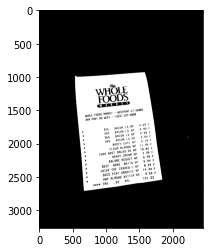

In [48]:
ret2,thresh3 = cv2.threshold(grey_scale,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thresh3, cmap="gray")
image_data = pytesseract.image_to_string(thresh3, config= '--psm 6')
print(image_data)


# Output in Json file

In [56]:
result = "".join(image_data)
pattern = r'\d*?\w*\s?\w*?\s\w+\s?\w*\s\w+\s?\d{1,}.\d*\sF'
reuslt = re.findall(pattern, result)
print(reuslt)
import json

with open("Bill_Output.json", "w") as write_file:
    json.dump(reuslt, write_file)



[' 365 BACON LS NP 4.99 F', ' 365 BACON LS NP 4.99 F', ' 365 BACON LS NP 4.99 F', ' 365 BACON LS NP 4.99 F', ' BROTH CHIC wp 29 F', ' FLOUR qLMOND NP 11.99 F', 'CHKN BRST BNLSS SK yp 18.80 F', ' HEAVY CREAM NP 3.39 F', '\nx BALSHC aepuct NP 6.49 F', 'JUICE cor CASHEW c NP 3.99 F', ' pocs PINT aRGanic NP 14.49 F', ' HNY ALMOND BUTTER NP 9.99 F']


# Trying Another Method

In [ ]:
import re

In [22]:
import nltk
from nltk import ngrams
import re

In [59]:
ngrams = nltk.ngrams(image_data.split(),7)
lis = list(ngrams)
print(lis)

[('WHOLE', 'FOODS', 'MARKET', '-', 'WESTPORT', 'CT', '06880'), ('FOODS', 'MARKET', '-', 'WESTPORT', 'CT', '06880', '.'), ('MARKET', '-', 'WESTPORT', 'CT', '06880', '.', '399'), ('-', 'WESTPORT', 'CT', '06880', '.', '399', 'post'), ('WESTPORT', 'CT', '06880', '.', '399', 'post', 'RD'), ('CT', '06880', '.', '399', 'post', 'RD', 'west'), ('06880', '.', '399', 'post', 'RD', 'west', '-'), ('.', '399', 'post', 'RD', 'west', '-', '(203)'), ('399', 'post', 'RD', 'west', '-', '(203)', '221-6858'), ('post', 'RD', 'west', '-', '(203)', '221-6858', '%'), ('RD', 'west', '-', '(203)', '221-6858', '%', '365'), ('west', '-', '(203)', '221-6858', '%', '365', 'BACON'), ('-', '(203)', '221-6858', '%', '365', 'BACON', 'LS'), ('(203)', '221-6858', '%', '365', 'BACON', 'LS', 'NP'), ('221-6858', '%', '365', 'BACON', 'LS', 'NP', '4.99'), ('%', '365', 'BACON', 'LS', 'NP', '4.99', 'F'), ('365', 'BACON', 'LS', 'NP', '4.99', 'F', '*'), ('BACON', 'LS', 'NP', '4.99', 'F', '*', '365'), ('LS', 'NP', '4.99', 'F', '*',

In [111]:
from fuzzywuzzy import fuzz
item = "365 BACON LS NP"
item1 = "BROTH CHIC"
final_output = []
for i in lis:
    result = " ".join(i)
    pattern = r'\s\d+.\d{1,}\sF'
    if fuzz.token_sort_ratio(item,result) > 75 and re.findall(pattern,result):
        final_output.append(i)
        
    elif fuzz.token_sort_ratio(item1,result) > 60 and re.findall(r'\s\w+\s\d+\sF',result):
        final_output.append(i)

print(set(final_output))
 


{('BACON', 'LS', 'NP', '4.99', 'F', '%', '365'), ('F', '%', 'BROTH', 'CHIC', 'wp', '29', 'F'), ('NP', '4.99', 'F', '%', '365', 'BACON', 'LS'), ('BROTH', 'CHIC', 'wp', '29', 'F', 'a', '%'), ('NP', '4.99', 'F', '*', '365', 'BACON', 'LS'), ('*', '365', 'BACON', 'LS', 'NP', '4.99', 'F'), ('LS', 'NP', '4.99', 'F', '%', '365', 'BACON'), ('365', 'BACON', 'LS', 'NP', '4.99', 'F', '*'), ('%', 'BROTH', 'CHIC', 'wp', '29', 'F', 'a'), ('LS', 'NP', '4.99', 'F', '*', '365', 'BACON'), ('BACON', 'LS', 'NP', '4.99', 'F', '*', '365'), ('365', 'BACON', 'LS', 'NP', '4.99', 'F', '%'), ('%', '365', 'BACON', 'LS', 'NP', '4.99', 'F')}
